In [48]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

In [49]:
def show_images(images, size=(16, 8), mode='rgb', image_type=None, grid=None, title=(None,None), fig_suptitle=None): 
        if not isinstance(images, tuple) and not isinstance(images, list):
            images = [images]
            title = [title]

        if isinstance(mode, tuple) or isinstance(mode, list):
            change_mode = True
        else:
            current_mode = mode
            change_mode = False
        
        if isinstance(image_type, tuple) or isinstance(image_type, list):
            change_mode_type = True
        else:
            current_mode_type = image_type
            change_mode_type = False
        
        if not grid:
            grid = []
            grid.append(math.ceil(len(images) / 2))
            grid.append(3)
            
        fig=plt.figure(figsize=size, dpi=150)
        for i, img in enumerate(images):
            fig.add_subplot(grid[0], grid[1], i+1)

            if change_mode:
                current_mode = mode[i]
            if change_mode_type:
                current_mode_type = image_type[i]

            if current_mode=='grayscale':
                if current_mode_type=='spectrum':
                    plt.imshow(np.abs(img)**(0.1), cmap='gray')
                else:
                    plt.imshow(img, cmap='gray')
            else:
                if current_mode_type=='spectrum':
                    plt.imshow(np.abs(img)**(0.1))
                else:
                    plt.imshow(img)
                    
            if title[i] is not None:
                plt.title(title[i])
            plt.axis('off')
        fig.suptitle(fig_suptitle, fontsize=16)
        plt.show()

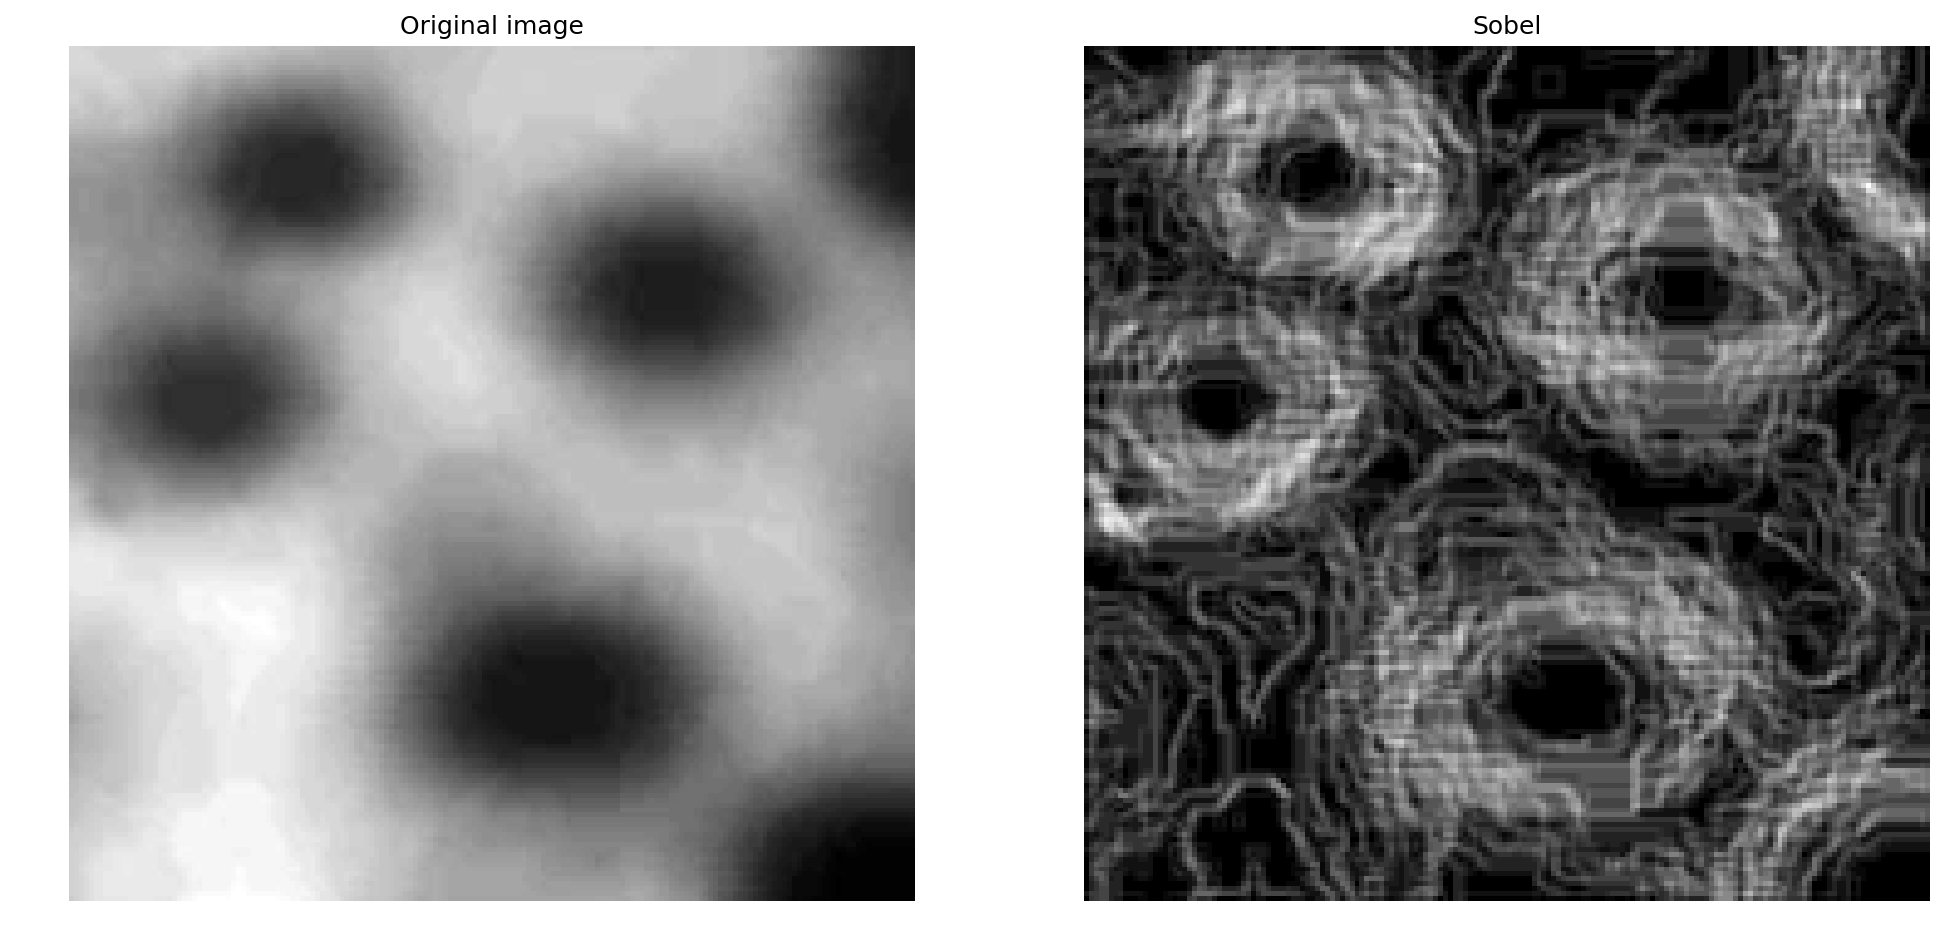

In [187]:
img_path = './ori.png'
img = cv2.imread(img_path, 0)
sobel_x = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
sobel_y = cv2.Sobel(img, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
sobel = np.absolute(sobel_x) + np.absolute(sobel_y)
show_images([img, sobel], 
            mode='grayscale', 
            grid=(1, 2), 
            title=('Original image', 'Sobel'), 
            image_type=None)